In [ ]:
!pip install db-sqlite3

     |████████████████████████████████| 171 kB 6.9 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1795 sha256=f37d8b266da97e3ff70532e6330bdcf7ef7339022903a77de3cdfd7351a2df5b
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3894 sha256=0d22c7007202db92d62f72ed7ebac5a85a651fa557c9779fad827a9640996852
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31678 sha256=be0a0e6ee1d3d968c59c14c2a8fcc4fde7a3f9388b28bff70242ef01eb60c523
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm


In [ ]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error

In [ ]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [ ]:
# def step1_create_region_table(data_filename, normalized_database_filename):
#     # Inputs: Name of the data and normalized database filename
#     # Output: None
conn = create_connection('911data.db') 
l = []
#[*range(21, 24), *range(0, 5)]
time_details = {range(5,12):('Morning',5,11),range(12,17):('Afternoon',12,16),range(17,21):('Evening',17,20),range(21, 24):('Night',21,4),range(0, 5):('Night',21,4)}
with open('911.csv','r') as f:
    for i in f:
        if i.split(',')[5] != 'timeStamp':
            d = i.split(',')[5]
            for k in time_details.keys():
              if int(d.strip().split(' ')[1].split(':')[0]) in k: 
                details = time_details[k]
                if details not in l:
                  l.append(details)
                break         
f.close()
sort_func = lambda s: s[1]
l = sorted(l,key = sort_func)
#print(l)

# conn = create_connection(normalized_database_filename)
with conn:
    create_query = 'CREATE TABLE IF NOT EXISTS TimeOfDay (TimeOfDayID Integer NOT NULL PRIMARY KEY, TimeOfDay text NOT NULL, StartTime integer NOT NULL, EndTime integer NOT NULL);'
    create_table(conn, create_query, drop_table_name='TimeOfDay')
    insert_query = "INSERT INTO TimeOfDay (TimeOfDay,StartTime,EndTime) VALUES (?,?,?)"
    cur_region = conn.cursor()
    cur_region.executemany(insert_query,l)
r = execute_sql_statement('SELECT * FROM TimeOfDay',conn)
print(r)
conn.commit()
conn.close()

[(1, 'Morning', 5, 11), (2, 'Afternoon', 12, 16), (3, 'Evening', 17, 20), (4, 'Night', 21, 4)]


In [ ]:
tod_dict = {}
conn = create_connection('911data.db')
sql_statement = "Select * from TimeOfDay"
df = execute_sql_statement(sql_statement,conn)
for row in df:
    tod_dict[row[1]] = row[0];
print(tod_dict)
conn.close()

{'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}


In [ ]:
conn = create_connection('911data.db')
l1 = []
# time_details = {range(5,12):('Morning',5,11),range(12,17):('Afetrnoon',12,16),range(17,21):('Evening',17,20),range(21,4,-1):('Night',21,4)}
with open('911.csv','r') as f1:
    for i in f1:
        if i.split(',')[6] != 'twp':
            d = i.split(',')[6].strip()
            if d != '':
              if (d,) not in l1:
                  l1.append((d,))  
f1.close()
# sort_func = lambda s: s[1]
# l1 = sorted(l,key = sort_func)
l1.sort()
print(l1)
# conn = create_connection(normalized_database_filename)
with conn:
    create_query = 'CREATE TABLE IF NOT EXISTS Township (TownshipID Integer NOT NULL PRIMARY KEY, TownshipName text NOT NULL);'
    create_table(conn, create_query, drop_table_name='Township')
    insert_query = "INSERT INTO Township (TownshipName) VALUES (?)"
    cur_region = conn.cursor()
    cur_region.executemany(insert_query,l1)
r = execute_sql_statement('SELECT * FROM Township',conn)
print(len(r))
conn.commit()
conn.close()

[('ABINGTON',), ('AMBLER',), ('BERKS COUNTY',), ('BRIDGEPORT',), ('BRYN ATHYN',), ('BUCKS COUNTY',), ('CHELTENHAM',), ('CHESTER COUNTY',), ('COLLEGEVILLE',), ('CONSHOHOCKEN',), ('DELAWARE COUNTY',), ('DOUGLASS',), ('EAST GREENVILLE',), ('EAST NORRITON',), ('FRANCONIA',), ('GREEN LANE',), ('HATBORO',), ('HATFIELD BORO',), ('HATFIELD TOWNSHIP',), ('HORSHAM',), ('JENKINTOWN',), ('LANSDALE',), ('LEHIGH COUNTY',), ('LIMERICK',), ('LOWER FREDERICK',), ('LOWER GWYNEDD',), ('LOWER MERION',), ('LOWER MORELAND',), ('LOWER POTTSGROVE',), ('LOWER PROVIDENCE',), ('LOWER SALFORD',), ('MARLBOROUGH',), ('MONTGOMERY',), ('NARBERTH',), ('NEW HANOVER',), ('NORRISTOWN',), ('NORTH WALES',), ('PENNSBURG',), ('PERKIOMEN',), ('PHILA COUNTY',), ('PLYMOUTH',), ('POTTSTOWN',), ('RED HILL',), ('ROCKLEDGE',), ('ROYERSFORD',), ('SALFORD',), ('SCHWENKSVILLE',), ('SKIPPACK',), ('SOUDERTON',), ('SPRINGFIELD',), ('TELFORD',), ('TOWAMENCIN',), ('TRAPPE',), ('UPPER DUBLIN',), ('UPPER FREDERICK',), ('UPPER GWYNEDD',), ('U

In [ ]:
twp_dict = {}
conn = create_connection('911data.db')
sql_statement = "Select * from Township"
df = execute_sql_statement(sql_statement,conn)
for row in df:
    twp_dict[row[1]] = row[0];
print(twp_dict)
conn.close()

{'ABINGTON': 1, 'AMBLER': 2, 'BERKS COUNTY': 3, 'BRIDGEPORT': 4, 'BRYN ATHYN': 5, 'BUCKS COUNTY': 6, 'CHELTENHAM': 7, 'CHESTER COUNTY': 8, 'COLLEGEVILLE': 9, 'CONSHOHOCKEN': 10, 'DELAWARE COUNTY': 11, 'DOUGLASS': 12, 'EAST GREENVILLE': 13, 'EAST NORRITON': 14, 'FRANCONIA': 15, 'GREEN LANE': 16, 'HATBORO': 17, 'HATFIELD BORO': 18, 'HATFIELD TOWNSHIP': 19, 'HORSHAM': 20, 'JENKINTOWN': 21, 'LANSDALE': 22, 'LEHIGH COUNTY': 23, 'LIMERICK': 24, 'LOWER FREDERICK': 25, 'LOWER GWYNEDD': 26, 'LOWER MERION': 27, 'LOWER MORELAND': 28, 'LOWER POTTSGROVE': 29, 'LOWER PROVIDENCE': 30, 'LOWER SALFORD': 31, 'MARLBOROUGH': 32, 'MONTGOMERY': 33, 'NARBERTH': 34, 'NEW HANOVER': 35, 'NORRISTOWN': 36, 'NORTH WALES': 37, 'PENNSBURG': 38, 'PERKIOMEN': 39, 'PHILA COUNTY': 40, 'PLYMOUTH': 41, 'POTTSTOWN': 42, 'RED HILL': 43, 'ROCKLEDGE': 44, 'ROYERSFORD': 45, 'SALFORD': 46, 'SCHWENKSVILLE': 47, 'SKIPPACK': 48, 'SOUDERTON': 49, 'SPRINGFIELD': 50, 'TELFORD': 51, 'TOWAMENCIN': 52, 'TRAPPE': 53, 'UPPER DUBLIN': 54, 

In [ ]:
# conn = create_connection('911data.db')
# l2 = []
# # time_details = {range(5,12):('Morning',5,11),range(12,17):('Afetrnoon',12,16),range(17,21):('Evening',17,20),range(21,4,-1):('Night',21,4)}
# with open('911.csv','r') as f1:
#     for i in f1:
#         if i.split(',')[4] != 'title':
#             d = i.split(',')[4].strip()
#             if d == '':
#                 d = ('No_info','No_info')
#             if (d.split(':')[0].strip(),d.split(':')[1].strip()) not in l2:
#                 l2.append((d.split(':')[0].strip(),d.split(':')[1].strip()))
# f1.close()
# # sort_func = lambda s: s[1]
# # l1 = sorted(l,key = sort_func)
# l2.sort()
# print(l2[0:20])
# # conn = create_connection(normalized_database_filename)
# with conn:
#     create_query = 'CREATE TABLE IF NOT EXISTS TypeOfIncident (TypeOfIncidentID Integer NOT NULL PRIMARY KEY, Category text NOT NULL, SubCategory text NOT NULL);'
#     create_table(conn, create_query, drop_table_name='TypeOfIncident')
#     insert_query = "INSERT INTO TypeOfIncident (Category,SubCategory) VALUES (?,?)"
#     cur_region = conn.cursor()
#     cur_region.executemany(insert_query,l2)
# r = execute_sql_statement('SELECT * FROM TypeOfIncident',conn)
# print(r)
# conn.commit()
# conn.close()

In [ ]:
#Incident Category Alternate design
conn = create_connection('911data.db')
cat_list = []
# time_details = {range(5,12):('Morning',5,11),range(12,17):('Afetrnoon',12,16),range(17,21):('Evening',17,20),range(21,4,-1):('Night',21,4)}
with open('911.csv','r') as f1:
    for i in f1:
        if i.split(',')[4] != 'title':
            d = i.split(',')[4].strip()
            if d == '':
                d = ('No_info','No_info')
            if (d.split(':')[0].strip(),) not in cat_list:
                cat_list.append((d.split(':')[0].strip(),))
f1.close()
sort_func = lambda s: s[0]
cat_list = sorted(cat_list,key = sort_func)

print(cat_list)
# conn = create_connection(normalized_database_filename)
with conn:
    create_query = '''
    CREATE TABLE IF NOT EXISTS IncidentCategory 
    (CategoryID Integer NOT NULL PRIMARY KEY AUTOINCREMENT, 
    Category text NOT NULL);'''
    create_table(conn, create_query, drop_table_name='IncidentCategory')
    insert_query = "INSERT INTO IncidentCategory (Category) VALUES (?)"
    cur_region = conn.cursor()
    cur_region.executemany(insert_query,cat_list)
r = execute_sql_statement('SELECT * FROM IncidentCategory',conn)
print(r)
conn.commit()
conn.close()

[('EMS',), ('Fire',), ('Traffic',)]
[(1, 'EMS'), (2, 'Fire'), (3, 'Traffic')]


Incident Category Dictionary

In [ ]:
cat_dict = {}
conn = create_connection('911data.db')
sql_statement = "Select * from IncidentCategory"
df = execute_sql_statement(sql_statement,conn)
for row in df:
    cat_dict[row[1]] = row[0];
print(cat_dict)
conn.close()

{'EMS': 1, 'Fire': 2, 'Traffic': 3}


Incident Sub category

In [ ]:
#Incident sub category Alternate design
conn = create_connection('911data.db')
subcat_list = []

with open('911.csv','r') as f1:
    for i in f1:
        cat_id = 0
        if i.split(',')[4] != 'title':
            d = i.split(',')[4].strip()
            if d == '':
                d = (0,'No_info')
            cat_id = cat_dict[d.split(':')[0].strip()];    
            if (cat_id,d.split(':')[1].strip()) not in subcat_list:
                subcat_list.append((cat_id,d.split(':')[1].strip()))
f1.close()
sort_func = lambda s: s[0]
subcat_list = sorted(subcat_list,key = sort_func)

print(subcat_list)
#conn = create_connection(normalized_database_filename)
sql_statement = "Select * from IncidentCategory"
df = execute_sql_statement(sql_statement,conn)
display(df)
with conn:
    create_query = '''
    CREATE TABLE IF NOT EXISTS IncidentSubCategory 
    (SubCategoryID Integer NOT NULL PRIMARY KEY AUTOINCREMENT, 
    CategoryID Integer NOT NULL,
    SubCategory Text NOT NULL,
    foreign key(CategoryID) references IncidentCategory(CategoryID));'''
    create_table(conn, create_query, drop_table_name='IncidentSubCategory')
    insert_query = "INSERT INTO IncidentSubCategory (CategoryID,SubCategory) VALUES (?,?)"
    cur_region = conn.cursor()
    cur_region.executemany(insert_query,subcat_list)
r = execute_sql_statement('SELECT * FROM IncidentSubCategory',conn)
#display(r)
conn.commit()
conn.close()

[(1, 'BACK PAINS/INJURY'), (1, 'DIABETIC EMERGENCY'), (1, 'CARDIAC EMERGENCY'), (1, 'DIZZINESS'), (1, 'HEAD INJURY'), (1, 'NAUSEA/VOMITING'), (1, 'RESPIRATORY EMERGENCY'), (1, 'SYNCOPAL EPISODE'), (1, 'VEHICLE ACCIDENT'), (1, 'GENERAL WEAKNESS'), (1, 'UNKNOWN MEDICAL EMERGENCY'), (1, 'UNRESPONSIVE SUBJECT'), (1, 'ALTERED MENTAL STATUS'), (1, 'CVA/STROKE'), (1, 'SUBJECT IN PAIN'), (1, 'HEMORRHAGING'), (1, 'FALL VICTIM'), (1, 'ASSAULT VICTIM'), (1, 'SEIZURES'), (1, 'MEDICAL ALERT ALARM'), (1, 'ABDOMINAL PAINS'), (1, 'OVERDOSE'), (1, 'MATERNITY'), (1, 'UNCONSCIOUS SUBJECT'), (1, 'CHOKING'), (1, 'LACERATIONS'), (1, 'FEVER'), (1, 'ALLERGIC REACTION'), (1, 'FRACTURE'), (1, 'BURN VICTIM'), (1, 'RESCUE - GENERAL'), (1, 'WARRANT SERVICE'), (1, 'EMS SPECIAL SERVICE'), (1, 'FIRE SPECIAL SERVICE'), (1, 'DEHYDRATION'), (1, 'CARBON MONOXIDE DETECTOR'), (1, 'BUILDING FIRE'), (1, 'APPLIANCE FIRE'), (1, 'SHOOTING'), (1, 'POISONING'), (1, 'RESCUE - TECHNICAL'), (1, 'EYE INJURY'), (1, 'ELECTROCUTION'), (

[(1, 'EMS'), (2, 'Fire'), (3, 'Traffic')]

Incident Sub category Dictionary

In [ ]:
subcat_dict = {}
conn = create_connection('911data.db')
sql_statement = "Select * from IncidentSubCategory"
df = execute_sql_statement(sql_statement,conn)
for row in df:
    subcat_dict[row[2]] = row[0];
conn.close()

Call Record Table 

In [ ]:
conn = create_connection('911data.db')
record_list = []
with open('911.csv','r') as f1:
    for i in f1:
      record_ele = []
      if i.split(',')[0] != 'lat':
          d = i.split(',')[0].strip()
          if d == '':
            record_ele.append(None)
          else:
            record_ele.append(d) #lat
      if i.split(',')[1] != 'lng':
          d = i.split(',')[6].strip()
          if d == '':
            record_ele.append(None)
          else:
            record_ele.append(d) #lng          
      if i.split(',')[4] != 'title':
          d = i.split(',')[4].strip()
          if d == '':
            record_ele.append(None)
            record_ele.append(None)
          else:
            record_ele.append( cat_dict[d.split(':')[0].strip()] ) #Category ID
            record_ele.append( subcat_dict[d.split(':')[1].strip()] ) #Sub Category ID
      if i.split(',')[2] != 'desc':
          d = i.split(',')[2].strip()
          if d == '':
              d = 'No_info'
          record_ele.append( d ) #Description
      if i.split(',')[3] != 'zip':
          d = i.split(',')[3].strip()
          if d == '':
              d = None
          record_ele.append( d ) #Zip               
      if i.split(',')[6] != 'twp':
          d = i.split(',')[6].strip()
          if d == '':
            d = None
          else:
            d = twp_dict[d]
          record_ele.append(d)  #Twp
      if i.split(',')[7] != 'addr':
          d = i.split(',')[7].strip()
          if d == '':
            d = 'No_info'
          record_ele.append(d)  #Address   
      if i.split(',')[5] != 'timeStamp':
          d = i.split(',')[5]
          if d == '':
            record_ele.append(None)
            record_ele.append(None)
          else:
            record_ele.append(d.strip().split(' ')[0]) #Date
            for k in time_details.keys():
              if int(d.strip().split(' ')[1].split(':')[0]) in k: 
                record_ele.append(tod_dict[ time_details[k][0] ] ) #time of day
      record_list.append(tuple(record_ele))
record_list = record_list[1:]  
print(len(record_list))
f1.close()

with conn:
    create_query ="""
    CREATE TABLE IF NOT EXISTS CallRecord (
      [RecordID] integer not null Primary Key AUTOINCREMENT,
      [latitude] real null,
      [longitude] real null,
      [CategoryID] integer not null,
      [SubCategoryID] integer not null,
      [Desc] Text not null,
      [Zip] integer null,
      [TownshipID] integer null,
      [Address] Text null,
      [Date] Date null ,
      [TimeOfDayID] integer null,
      FOREIGN KEY(CategoryID) REFERENCES IncidentCategory(CategoryID),
      FOREIGN KEY(SubCategoryID) REFERENCES IncidentSubCategory(SubCategoryID),
      FOREIGN KEY(TownshipID) REFERENCES Township(TownshipID),
      FOREIGN KEY(TimeOfDayID) REFERENCES TimeOfDay(TimeOfDayID)
    );
    """
    create_table(conn, create_query, drop_table_name='CallRecord')
    insert_query = '''INSERT INTO CallRecord (latitude,longitude,CategoryID,SubCategoryID,Desc,Zip,TownshipID,Address,Date,TimeOfDayID) 
    VALUES (?,?,?,?,?,?,?,?,?,?)'''
    cur_region = conn.cursor()
    dummy_list = [(1, 1, 'Add;', '19446', None, 'BRIAR PATH & WHITEMARSH LN', '2015-12-10', None)]
    cur_region.executemany(insert_query,record_list)
r = execute_sql_statement('SELECT count(*) FROM CallRecord',conn)
print(r)
conn.commit()
conn.close()

663522
[(663522,)]


In [120]:
conn = create_connection('911data.db')
sql_statement = f'select T.TownshipName'\
f',count(*) as TotalCalls from CallRecord CR inner join Township as T on CR.TownshipID = T.TownshipID and CR.TownshipID not null'\
f' group by T.TownshipID order by TotalCalls desc'
df = pd.read_sql_query(sql_statement, conn)
ts = sum(df['TotalCalls'])
df['Percentage'] = df['TotalCalls'].apply(lambda x:(x/ts)*100)
df['CummulativePercentage'] = df['TotalCalls'].cumsum().apply(lambda x:(x/ts)*100)
df1 = pd.DataFrame(df.loc[df['CummulativePercentage']<=50])

df1.style.hide_index().bar(subset=["Percentage"], color='#FFA07A')
df1.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#420929'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': '',
  'props': [('border', '2px solid black'), ]
  }
 
]
).hide_index().background_gradient(cmap='Oranges')


TownshipName,TotalCalls,Percentage,CummulativePercentage
LOWER MERION,55490,8.366643,8.366643
ABINGTON,39947,6.023108,14.389751
NORRISTOWN,37633,5.674209,20.063960
UPPER MERION,36010,5.429497,25.493457
CHELTENHAM,30574,4.609871,30.103328
POTTSTOWN,27387,4.129343,34.232671
UPPER MORELAND,22932,3.457629,37.690300
LOWER PROVIDENCE,22476,3.388875,41.079175
PLYMOUTH,20116,3.033040,44.112215
UPPER DUBLIN,18862,2.843965,46.956180


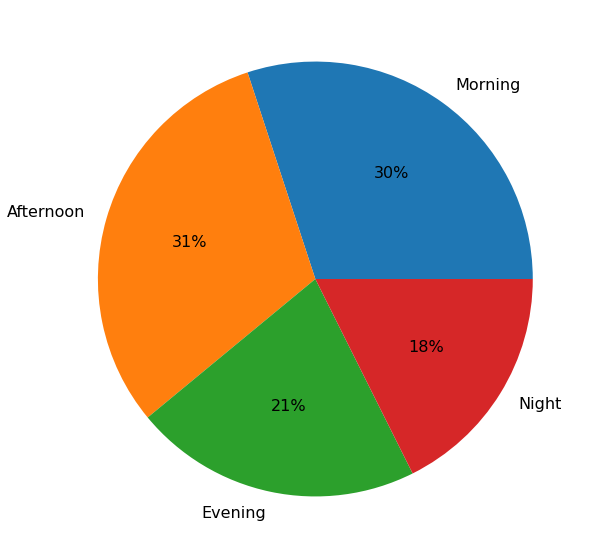

In [139]:
conn = create_connection('911data.db')
sql_statement = f'select T.TimeOfDay'\
f',count(*) as TotalCalls from CallRecord CR inner join TimeOfDay as T on CR.TimeOfDayID = T.TimeOfDayID and CR.TimeOfDayID not null'\
f' group by T.TimeOfDayID '
df = pd.read_sql_query(sql_statement, conn)

df.set_index('TimeOfDay', inplace=True)
df.plot.pie(y='TotalCalls', legend=False,autopct = '%.0f%%',ylabel='',figsize = (10,10),textprops={'fontsize': 16})


Category
EMS        AxesSubplot(0.125,0.125;0.775x0.755)
Fire       AxesSubplot(0.125,0.125;0.775x0.755)
Traffic    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TotalCalls, dtype: object

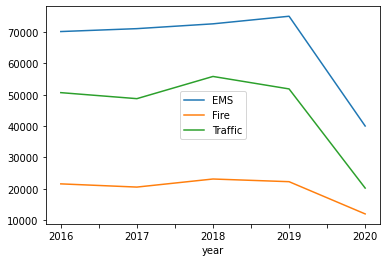

In [125]:
conn = create_connection('911data.db')
sql_statement = f'select strftime("%Y",CR.Date) as year'\
f',count(*) as TotalCalls,Category from CallRecord CR inner join IncidentCategory as IC on CR.CategoryID = IC.CategoryID and CR.CategoryID not null'\
f' group by year,CR.categoryID '
df = pd.read_sql_query(sql_statement, conn)
df = pd.DataFrame(df.loc[df['year']!='2015'])
df.set_index('year', inplace=True)
df.groupby('Category')['TotalCalls'].plot(legend=True)




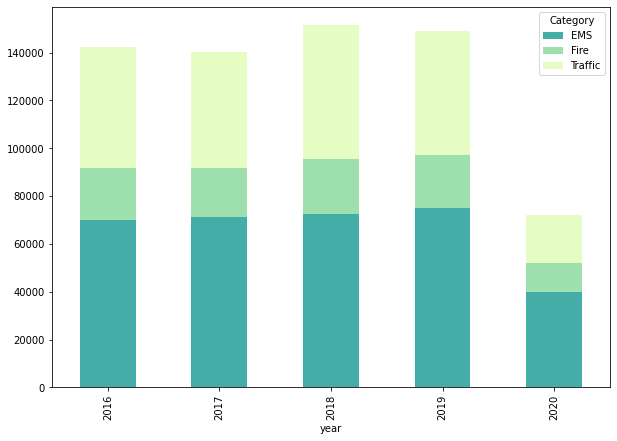

In [135]:
conn = create_connection('911data.db')
sql_statement = f'select strftime("%Y",CR.Date) as year'\
f',count(*) as TotalCalls,Category from CallRecord CR inner join IncidentCategory as IC on CR.CategoryID = IC.CategoryID and CR.CategoryID not null'\
f' group by year,CR.categoryID '
df = pd.read_sql_query(sql_statement, conn)
df = pd.DataFrame(df.loc[df['year']!='2015'])
pivot_df = df.pivot(index='year', columns='Category', values='TotalCalls')
colors = ["#45ADA8", "#9DE0AD","#E5FCC2"]
pivot_df.loc[:,['EMS','Fire', 'Traffic']].plot.bar(stacked=True, color=colors, figsize=(10,7))